In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
df=pd.read_csv('customer_churn.csv')
df.drop(['customerID'],axis='columns',inplace=True)

In [3]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
for columns in df:
    print(f'{columns}: {df[columns].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [6]:
df.Partner.replace('Yes', 1,inplace=True)
df.Partner.replace('No', 0,inplace=True)

df.gender.replace('Male', 1,inplace=True)
df.gender.replace('Female', 0,inplace=True)

df.Dependents.replace('Yes', 1,inplace=True)
df.Dependents.replace('No', 0,inplace=True)

df.PaperlessBilling.replace('Yes', 1,inplace=True)
df.PaperlessBilling.replace('No', 0,inplace=True)

df.PhoneService.replace('Yes', 1,inplace=True)
df.PhoneService.replace('No', 0,inplace=True)

df.Churn.replace('Yes', 1,inplace=True)
df.Churn.replace('No', 0,inplace=True)

df.OnlineSecurity.replace('No internet service', 'No',inplace=True)
df.OnlineBackup.replace('No internet service', 'No',inplace=True)
df.DeviceProtection.replace('No internet service', 'No',inplace=True)
df.TechSupport.replace('No internet service', 'No',inplace=True)
df.StreamingTV.replace('No internet service', 'No',inplace=True)
df.StreamingMovies.replace('No internet service', 'No',inplace=True)
df.MultipleLines.replace('No phone service', 'No',inplace=True)

In [7]:
for columns in df:
    print(f'{columns}: {df[columns].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


In [8]:
yes_no=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']

for item in yes_no:
    df[item].replace({'Yes':1,'No':0},inplace=True)

In [9]:
for item in df:
    print(f'{item}:{df[item].unique()}')

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:[0 1]


In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,0,DSL,1,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,,0
753,1,0,0,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.25,,0
936,0,0,1,1,0,1,0,DSL,1,1,1,0,1,1,Two year,0,Mailed check,80.85,,0
1082,1,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.75,,0
1340,0,0,1,1,0,0,0,DSL,1,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,,0
3331,1,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,19.85,,0
3826,1,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.35,,0
4380,0,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.00,,0
5218,1,0,1,1,0,1,0,No,0,0,0,0,0,0,One year,1,Mailed check,19.70,,0
6670,0,0,1,1,0,1,1,DSL,0,1,1,1,1,0,Two year,0,Mailed check,73.35,,0


In [11]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [12]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

c:\users\harsshh wankhayday\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [13]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [14]:
df2=pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [15]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


# Scaling

In [16]:
to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[to_scale]=scaler.fit_transform(df2[to_scale])

In [17]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df2.drop('Churn',axis='columns'),df2['Churn'],test_size=0.2,random_state=5)

In [19]:
x_train.shape

(5625, 26)

In [20]:
x_test.shape

(1407, 26)

In [21]:
y_train.shape

(5625,)

In [22]:
y_test.shape

(1407,)

In [23]:
x_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,0,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,1,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,0,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,1,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [24]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5681 - accuracy: 0.6844
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.7961
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4204 - accuracy: 0.7988
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4163 - accuracy: 0.8043
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4140 - accuracy: 0.8044
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.8048
Epoch 7/100
176/176 [==============================] - 0s 935us/step - loss: 0.4115 - accuracy: 0.8062
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8076
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8078
Epoch 10/100
176/176 [==============================] - 0s 949us/step - loss: 0.4084 - ac

176/176 [==============================] - 0s 957us/step - loss: 0.3741 - accuracy: 0.8272
Epoch 81/100
176/176 [==============================] - 0s 948us/step - loss: 0.3736 - accuracy: 0.8272
Epoch 82/100
176/176 [==============================] - 0s 749us/step - loss: 0.3746 - accuracy: 0.8260
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3744 - accuracy: 0.8244
Epoch 84/100
176/176 [==============================] - 0s 909us/step - loss: 0.3731 - accuracy: 0.8256
Epoch 85/100
176/176 [==============================] - 0s 838us/step - loss: 0.3731 - accuracy: 0.8247
Epoch 86/100
176/176 [==============================] - 0s 820us/step - loss: 0.3728 - accuracy: 0.8284
Epoch 87/100
176/176 [==============================] - 0s 833us/step - loss: 0.3731 - accuracy: 0.8258
Epoch 88/100
176/176 [==============================] - 0s 826us/step - loss: 0.3718 - accuracy: 0.8260
Epoch 89/100
176/176 [==============================] - 0s 848us/step - loss: 0

In [25]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 909us/step - loss: 0.4685 - accuracy: 0.7818


[0.468526691198349, 0.7818052768707275]

In [26]:
ans=model.predict(x_test)
ans[:]
final_ans=[]
for item in ans:
    if item<0.5:
        final_ans.append(0)
    else:
        final_ans.append(1)

In [27]:
final_ans[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [28]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [29]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,final_ans))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.64      0.56      0.60       408

    accuracy                           0.78      1407
   macro avg       0.74      0.72      0.72      1407
weighted avg       0.77      0.78      0.78      1407



Text(69.0, 0.5, 'Truth')

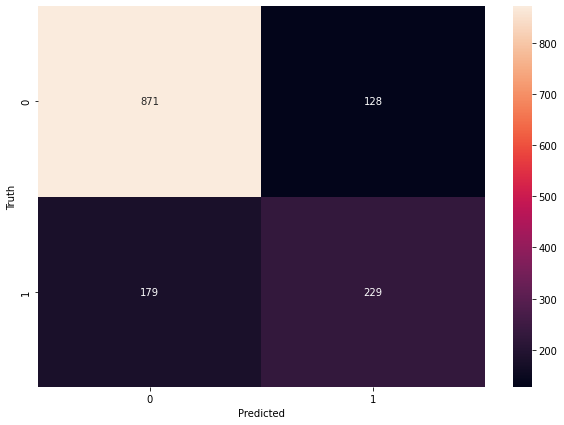

In [30]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm=tf.math.confusion_matrix(labels=y_test,predictions=final_ans)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Handling Imbalanced data

In [35]:
for item in df2:
    print(item)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
MonthlyCharges
TotalCharges
Churn
InternetService_DSL
InternetService_Fiber optic
InternetService_No
Contract_Month-to-month
Contract_One year
Contract_Two year
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check


In [36]:
df2['Churn'].unique()

array([0, 1], dtype=int64)

In [42]:
df2[df2['Churn']==1].shape,df2[df2['Churn']==0].shape

((1869, 27), (5163, 27))

# method 1- using undersampling

In [45]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [74]:
class_0=df2[df2['Churn']==0]
class_1=df2[df2['Churn']==1]
count_class0=class_0.iloc[:,1].count()
count_class1=class_1.iloc[:,1].count()
class_0.shape

(5163, 27)

In [73]:
class_0train=class_0[:int(count_class0*0.8)]
class_0test=class_0[int(count_class0*0.8):]
class_1train=class_1[:int(count_class1*0.8)]
class_1test=class_1[int(count_class1*0.8):]

count_class0_train=class_0train.iloc[:,1].count()
count_class0_test=class_0test.iloc[:,1].count()
count_class0_train

4130

In [71]:
class_1_train_over = class_0train.sample(count_class0_train, replace=True)
class_1_test_over = class_0test.sample(count_class0_test, replace=True)

In [78]:
train_set=pd.concat([class_1_train_over,class_0train],axis=0)
test_set=pd.concat([class_1_test_over, class_0test],axis=0)
train_set.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [80]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(train_set.drop('Churn',axis='columns'),train_set['Churn'],epochs=100)

Epoch 1/100
259/259 [==============================] - 1s 882us/step - loss: 0.0621 - accuracy: 0.9983
Epoch 2/100
259/259 [==============================] - 0s 945us/step - loss: 9.5859e-04 - accuracy: 1.0000
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 2.6693e-04 - accuracy: 1.0000
Epoch 4/100
259/259 [==============================] - 0s 892us/step - loss: 1.2385e-04 - accuracy: 1.0000
Epoch 5/100
259/259 [==============================] - 0s 883us/step - loss: 7.0748e-05 - accuracy: 1.0000
Epoch 6/100
259/259 [==============================] - 0s 901us/step - loss: 4.5240e-05 - accuracy: 1.0000
Epoch 7/100
259/259 [==============================] - 0s 928us/step - loss: 3.1010e-05 - accuracy: 1.0000
Epoch 8/100
259/259 [==============================] - 0s 922us/step - loss: 2.2297e-05 - accuracy: 1.0000
Epoch 9/100
259/259 [==============================] - 0s 997us/step - loss: 1.6605e-05 - accuracy: 1.0000
Epoch 10/100
259/259 [=====================

259/259 [==============================] - 0s 995us/step - loss: 7.2460e-10 - accuracy: 1.0000
Epoch 78/100
259/259 [==============================] - 0s 906us/step - loss: 6.5912e-10 - accuracy: 1.0000
Epoch 79/100
259/259 [==============================] - 0s 921us/step - loss: 6.0068e-10 - accuracy: 1.0000
Epoch 80/100
259/259 [==============================] - 0s 943us/step - loss: 5.4870e-10 - accuracy: 1.0000
Epoch 81/100
259/259 [==============================] - 0s 904us/step - loss: 5.0191e-10 - accuracy: 1.0000
Epoch 82/100
259/259 [==============================] - 0s 847us/step - loss: 4.6042e-10 - accuracy: 1.0000
Epoch 83/100
259/259 [==============================] - 0s 839us/step - loss: 4.2278e-10 - accuracy: 1.0000
Epoch 84/100
259/259 [==============================] - 0s 852us/step - loss: 3.8903e-10 - accuracy: 1.0000
Epoch 85/100
259/259 [==============================] - 0s 832us/step - loss: 3.5863e-10 - accuracy: 1.0000
Epoch 86/100
259/259 [===================

In [81]:
model.evaluate(test_set.drop('Churn',axis='columns'),test_set['Churn'])

65/65 [==============================] - 0s 770us/step - loss: 2.2876e-10 - accuracy: 1.0000


[2.2875626393137338e-10, 1.0]